<center><font color='blue' size='6'>IRIS FLOWER CLASSIFICATION</font></center>



Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine Learning.



In [1]:
import pandas as pd
import numpy as np
import regex as reg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data['SepalLengthCm'] = data['SepalLengthCm'].astype(float).round(1)
data['SepalLengthCm']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [5]:
data['SepalWidthCm'] = data['SepalWidthCm'].astype(float).round(1)
data['SepalWidthCm']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

In [6]:
data['PetalLengthCm'] = data['PetalLengthCm'].astype(float).round(1)
data['PetalLengthCm']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64

In [7]:
data['PetalWidthCm'] = data['PetalWidthCm'].astype(float).round(1)
data['PetalWidthCm']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

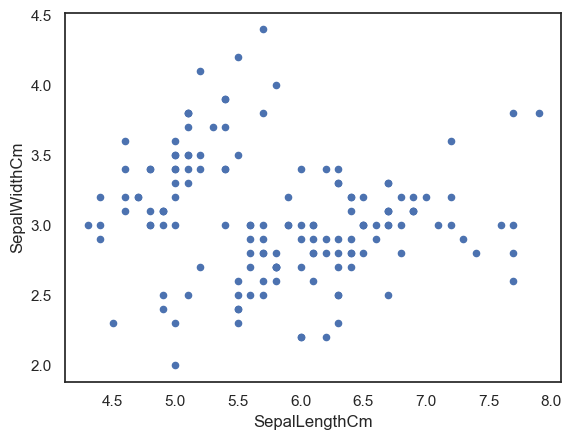

In [11]:
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

C:\applications\Anaconda\New folder\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


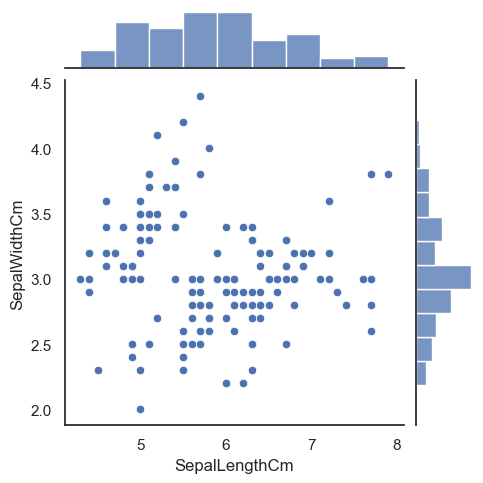

In [12]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data, size=5)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

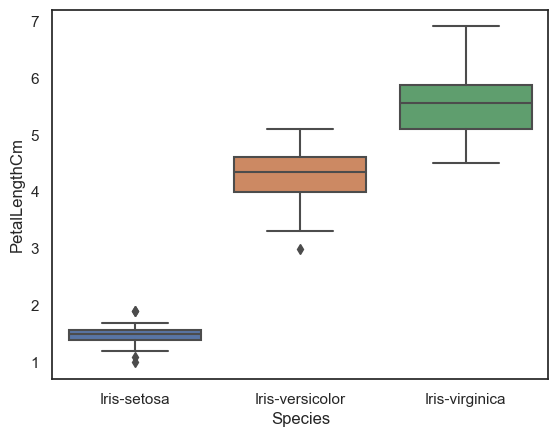

In [13]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=data)

C:\applications\Anaconda\New folder\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


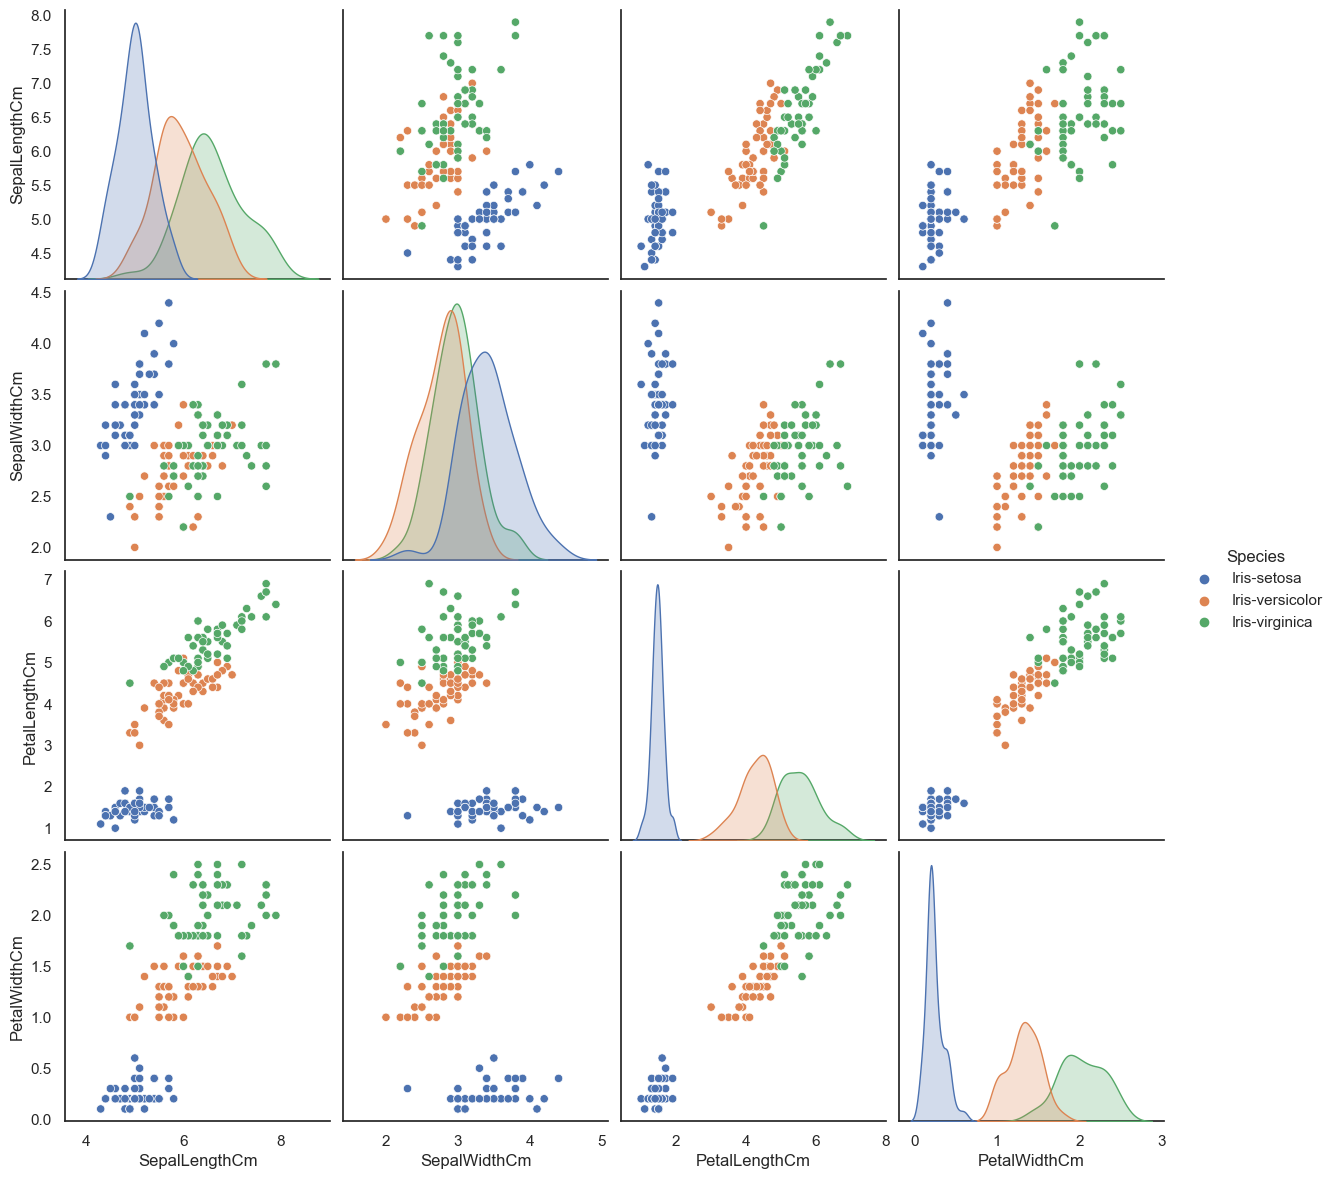

In [14]:
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3)

### 8. Data split (80/20 ratio)

In [20]:
# Seperating the data into dependent and independent variables
data1 = data.values
X = data1[:,0:4]
y = data1[:,-1]

In [16]:
X

array([[1, 5.1, 3.5, 1.4],
       [2, 4.9, 3.0, 1.4],
       [3, 4.7, 3.2, 1.3],
       [4, 4.6, 3.1, 1.5],
       [5, 5.0, 3.6, 1.4],
       [6, 5.4, 3.9, 1.7],
       [7, 4.6, 3.4, 1.4],
       [8, 5.0, 3.4, 1.5],
       [9, 4.4, 2.9, 1.4],
       [10, 4.9, 3.1, 1.5],
       [11, 5.4, 3.7, 1.5],
       [12, 4.8, 3.4, 1.6],
       [13, 4.8, 3.0, 1.4],
       [14, 4.3, 3.0, 1.1],
       [15, 5.8, 4.0, 1.2],
       [16, 5.7, 4.4, 1.5],
       [17, 5.4, 3.9, 1.3],
       [18, 5.1, 3.5, 1.4],
       [19, 5.7, 3.8, 1.7],
       [20, 5.1, 3.8, 1.5],
       [21, 5.4, 3.4, 1.7],
       [22, 5.1, 3.7, 1.5],
       [23, 4.6, 3.6, 1.0],
       [24, 5.1, 3.3, 1.7],
       [25, 4.8, 3.4, 1.9],
       [26, 5.0, 3.0, 1.6],
       [27, 5.0, 3.4, 1.6],
       [28, 5.2, 3.5, 1.5],
       [29, 5.2, 3.4, 1.4],
       [30, 4.7, 3.2, 1.6],
       [31, 4.8, 3.1, 1.6],
       [32, 5.4, 3.4, 1.5],
       [33, 5.2, 4.1, 1.5],
       [34, 5.5, 4.2, 1.4],
       [35, 4.9, 3.1, 1.5],
       [36, 5.0, 3.2, 1.2],
 

In [21]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [22]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

## K-Nearest Neighbours

In [23]:

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


C:\applications\Anaconda\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Support Vector Machine's 

In [24]:

from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

y_pred =svm_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


## LogisticRegression

In [25]:

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

y_pred = lr_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


C:\applications\Anaconda\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree's

In [26]:

from sklearn.tree import DecisionTreeClassifier

dtc_classifier = DecisionTreeClassifier()

dtc_classifier.fit(X_train, y_train)

y_pred = dtc_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


 ## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf_classifier= RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
accuracy is 1.0


In [29]:
#SVM prdiction

In [31]:
X_new = np.array([[5, 5.0, 3.6, 1.4],
       [6, 5.4, 3.9, 1.7], [77, 6.8, 2.8, 4.8],
       [78, 6.7, 3.0, 5.0],[147, 6.3, 2.5, 5.0],
       [148, 6.5, 3.0, 5.2]])
#Prediction of the species from the input vector
prediction =svm_classifier.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [32]:
#random forest prdiction

In [33]:
X_new = np.array([[5, 5.0, 3.6, 1.4],
       [6, 5.4, 3.9, 1.7], [77, 6.8, 2.8, 4.8],
       [78, 6.7, 3.0, 5.0],[147, 6.3, 2.5, 5.0],
       [148, 6.5, 3.0, 5.2]])
#Prediction of the species from the input vector
prediction =rf_classifier.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [34]:
#diseason tree clasification  prdiction

In [35]:
X_new = np.array([[5, 5.0, 3.6, 1.4],
       [6, 5.4, 3.9, 1.7], [77, 6.8, 2.8, 4.8],
       [78, 6.7, 3.0, 5.0],[147, 6.3, 2.5, 5.0],
       [148, 6.5, 3.0, 5.2]])
#Prediction of the species from the input vector
prediction =rf_classifier.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [36]:
#logistic regresion  prdiction

In [37]:
X_new = np.array([[5, 5.0, 3.6, 1.4],
       [6, 5.4, 3.9, 1.7], [77, 6.8, 2.8, 4.8],
       [78, 6.7, 3.0, 5.0],[147, 6.3, 2.5, 5.0],
       [148, 6.5, 3.0, 5.2]])
#Prediction of the species from the input vector
prediction =lr_classifier.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [38]:
#KNN prdiction

In [39]:
X_new = np.array([[5, 5.0, 3.6, 1.4],
       [6, 5.4, 3.9, 1.7], [77, 6.8, 2.8, 4.8],
       [78, 6.7, 3.0, 5.0],[147, 6.3, 2.5, 5.0],
       [148, 6.5, 3.0, 5.2]])
#Prediction of the species from the input vector
prediction =knn_classifier.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


C:\applications\Anaconda\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
